## StreetEasy Regression Project

### Data source

-  The dataset is from [Kaggle](https://www.kaggle.com/). The file can be downloaded [here](https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset).

#### Importing core data science libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import matplotlib
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (9,6)

#### Importing data

In [2]:
# Importing data form csv file to dataframe
df = pd.read_csv('data/manhattan.csv')

#### Data inspection and manipulation

- Taking a look at the columns:

In [3]:
# Showing all columns
df.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

- Showing the first five rows:

In [4]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


- Checking if there are null values:

In [5]:
df.isna().sum()

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

- Filtering out unneeded columns:

In [6]:
df = df[['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'neighborhood']]

- Showing mean values sorted by neighborhood:

In [7]:
df.groupby(['neighborhood']).mean()

,rent,bedrooms,bathrooms,size_sqft
neighborhood,,,,
Battery Park City,5968.961538,1.500000,1.576923,1018.538462
Central Harlem,2963.926829,1.615854,1.317073,915.146341
Central Park South,7506.956522,1.543478,1.652174,1173.304348
Chelsea,6193.483516,1.250000,1.412088,968.912088
Chinatown,2955.625000,1.125000,1.000000,635.375000
East Harlem,2502.000000,1.524390,1.073171,768.512195
East Village,4304.361111,1.157407,1.148148,768.037037
Financial District,4263.925373,0.938433,1.246269,831.160448
Flatiron,6120.174242,1.193182,1.371212,915.560606


### Multiple Linear Regression Model

I want to move into a new rental unit in Midtown East. Let's use a multiple linear regression model to predict the rent price. 

- Creating a new dataframe with rental units only in Midtown East:

In [8]:
midtowneast = df[df['neighborhood'] == 'Midtown East']

midtowneast.shape

(460, 5)

- A quick summary of our Midtown East dataframe:

In [9]:
midtowneast.describe()

,rent,bedrooms,bathrooms,size_sqft
count,460.000000,460.000000,460.000000,460.000000
mean,4703.697826,1.286957,1.306522,896.676087
std,2751.957588,0.917776,0.551845,439.851432
min,1650.000000,0.000000,0.000000,265.000000
25%,3000.000000,1.000000,1.000000,600.000000
50%,3897.500000,1.000000,1.000000,764.000000
75%,5487.500000,2.000000,2.000000,1070.250000
max,20000.000000,4.000000,3.000000,3016.000000


Our variables:
- x variables will be the number of bedrooms, number of bathrooms and size in square feet
- y variable (target variable) will be the rent price 

In [10]:
x = midtowneast[['bedrooms', 'bathrooms', 'size_sqft']]

y = midtowneast[['rent']]

- Using Scikit-Learn's train_test_split module to split the data. I will use 80% for training and 20% for testing.

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=3)

- Creating the Multiple Linear Regression Model:

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = True)

# Training the model on training set
reg.fit(x_train, y_train)

LinearRegression()

We have created our model. Let's test the accuracy.

- Checking the test score:

In [13]:
score = reg.score(x_test, y_test)
print(score)

0.8144342041864534


- Creating the y prediction variable from x test set:

In [14]:
y_predict = reg.predict(x_test)

- Creating a scatter plot of the prediction values on test values using Matplotlib:

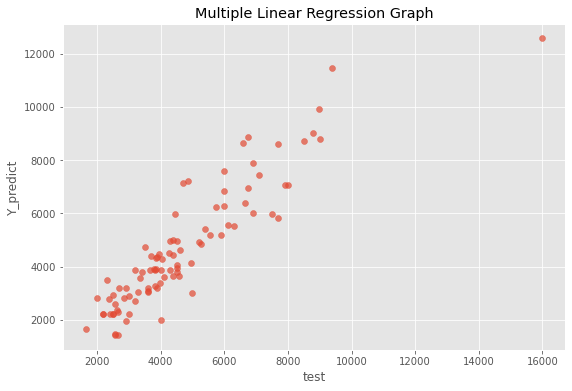

In [15]:
plt.scatter(y_test, y_predict, alpha = 0.7)
plt.xlabel('test')
plt.ylabel('Y_predict')
plt.title('Multiple Linear Regression Graph')
plt.show()

#### Predicting rent price using our models

- Prediction for a 1 bedroom, 1 bathroom, 600 sqft unit:

In [16]:
print(reg.predict([[1, 1, 600]]))

[[2897.84521083]]


- Prediction for a 2 bedroom, 2 bathroom, 800 sqft unit:

In [17]:
print(reg.predict([[2, 2, 800]]))

[[4193.34099056]]
